# 作业第三周（2）MLP模型练习

#### 1.在上一个练习基础上，尝试设计更复杂的多层感知机网络（并加入dropout等正则化措施，避免过拟合。），提升fashion_mnist的分类的准确率。


In [1]:
#首先执行GPU资源分配代码，勿删除。
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
# train & test
from keras.datasets import fashion_mnist
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()

# normalize and one-hot
from keras.utils import np_utils
x_train = x_train_raw.reshape(60000, 784).astype("float32") / 255
x_test = x_test_raw.reshape(10000, 784).astype("float32") / 255
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [3]:
# model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor="val_loss", patience=4, verbose=1)

model = Sequential()
model.add(Dense(256, activation='tanh', kernel_initializer = 'he_normal' ,input_shape=(28*28,)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='tanh',kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='tanh',kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='sigmoid',kernel_initializer = 'he_normal'))
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.975, decay=2e-06, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# history = model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stop])
history = model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.8689 - accuracy: 0.6791 - val_loss: 0.5200 - val_accuracy: 0.8181
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5999 - accuracy: 0.7918 - val_loss: 0.4799 - val_accuracy: 0.8280
Epoch 3/100
750/750 [==============================] - 3s 3ms/step - loss: 0.5550 - accuracy: 0.8082 - val_loss: 0.4573 - val_accuracy: 0.8446
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5281 - accuracy: 0.8198 - val_loss: 0.4261 - val_accuracy: 0.8486
Epoch 5/100
750/750 [==============================] - 3s 3ms/step - loss: 0.5157 - accuracy: 0.8231 - val_loss: 0.4280 - val_accuracy: 0.8503
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4990 - accuracy: 0.8274 - val_loss: 0.4163 - val_accuracy: 0.8537
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4909 - accuracy: 0.8324 - val_loss: 0.4312 - val_accuracy: 0.8466

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-e2504o_8 because the default path (/home/student/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


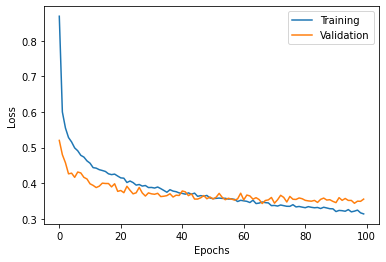

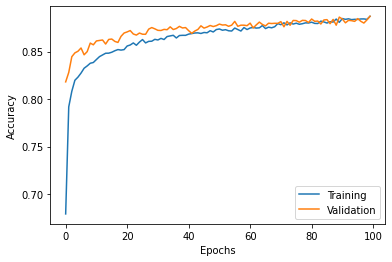

In [4]:
# visualize
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

# history.history.keys()
plot_history(history)

In [5]:
# test
scores = model.evaluate(x_test, y_test)
print(f"loss:{scores[0]:.4f}, accuracy:{scores[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8782
loss:0.3900, accuracy:0.8782


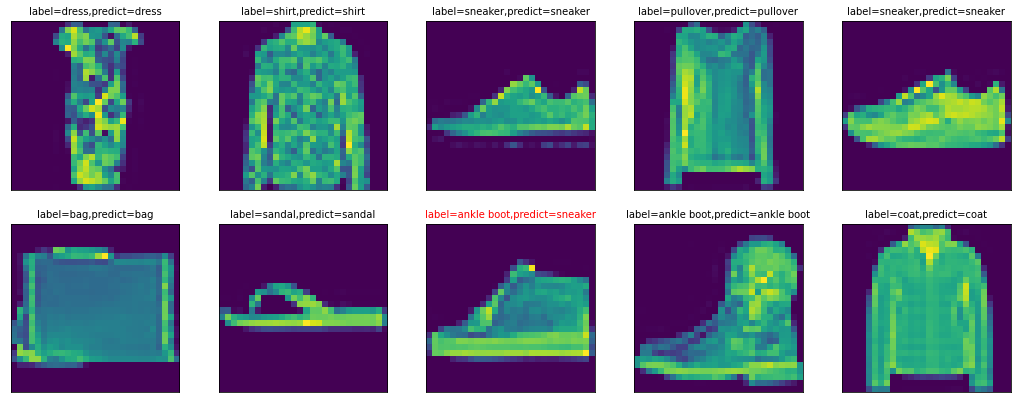

In [11]:
# predict
prediction = model.predict_classes(x_test)

# convert label_id to label_text
def get_fashion_mnist_labels(label_id):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return text_labels[label_id]

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(18, 18)
    fig.tight_layout()
    if num > 25:
        num = 25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx])
        title = "label=" + get_fashion_mnist_labels(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + get_fashion_mnist_labels(prediction[idx])
        if labels[idx] != prediction[idx]:
            color = "red"
        else: 
            color = "black"
        ax.set_title(title, fontsize=10, color=color)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
#     plt.colorbar()
    plt.show()

plot_images_labels_prediction(x_test_raw, y_test_raw, prediction, idx=100)